In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

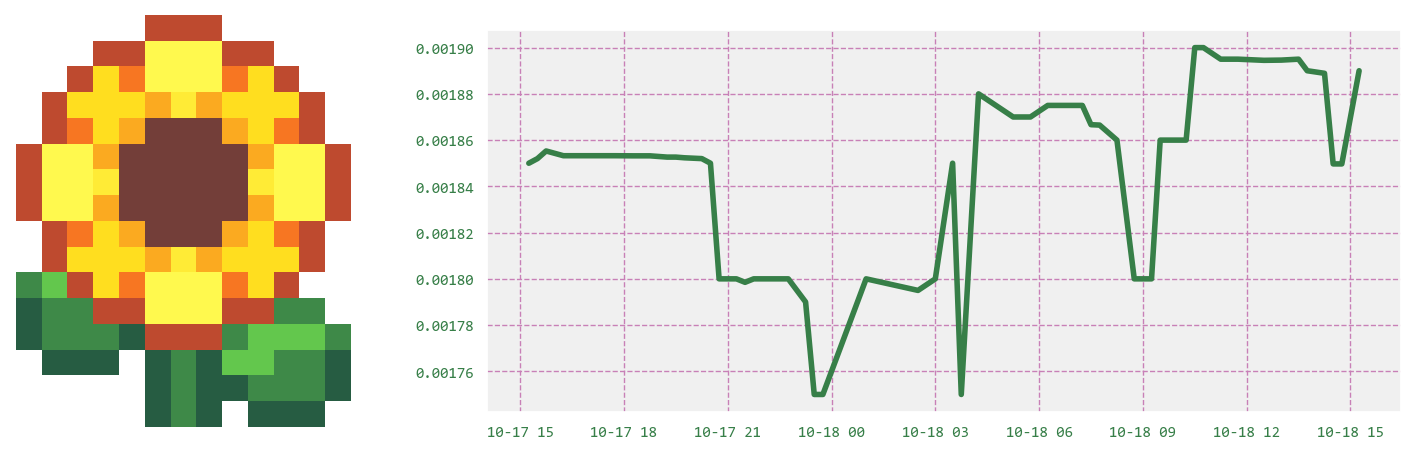

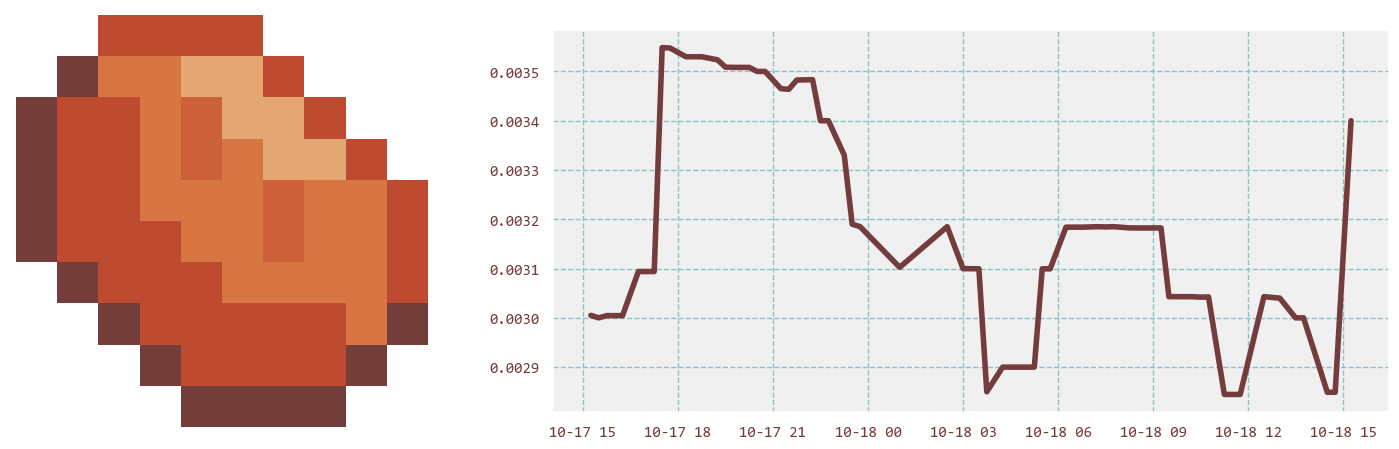

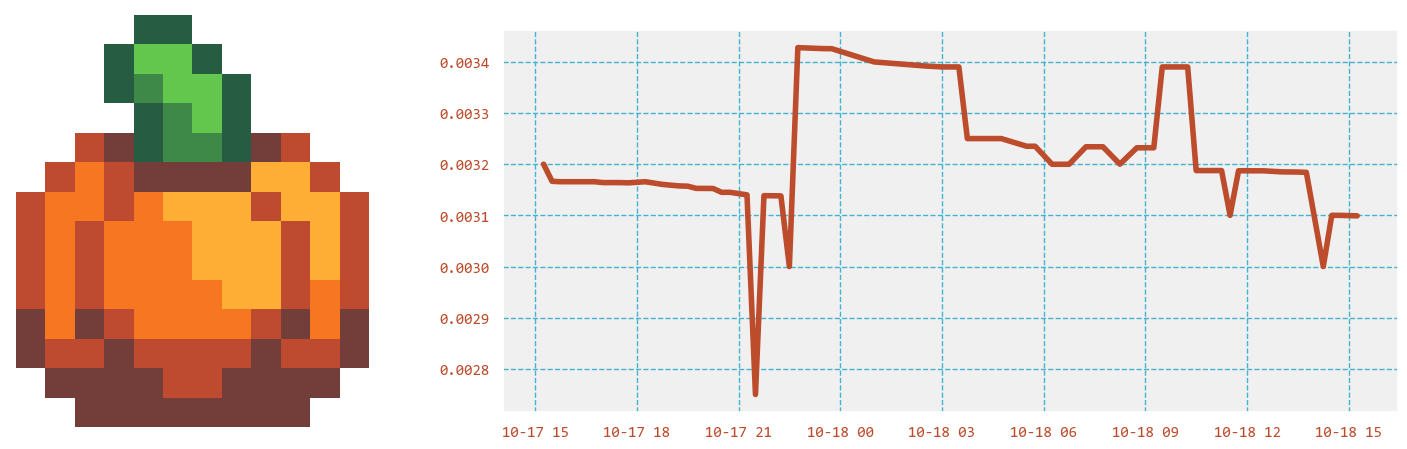

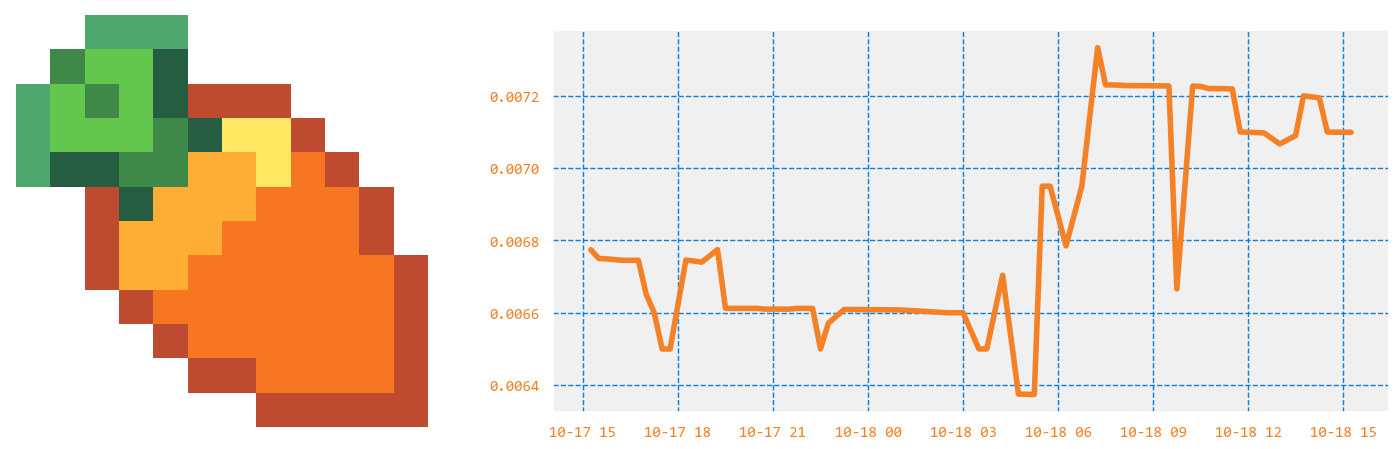

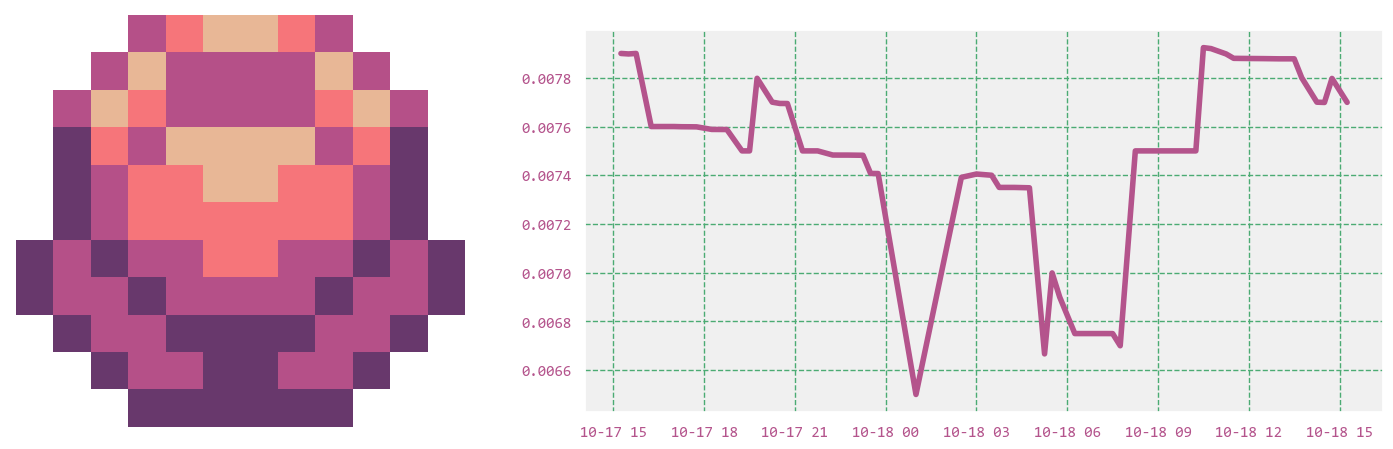

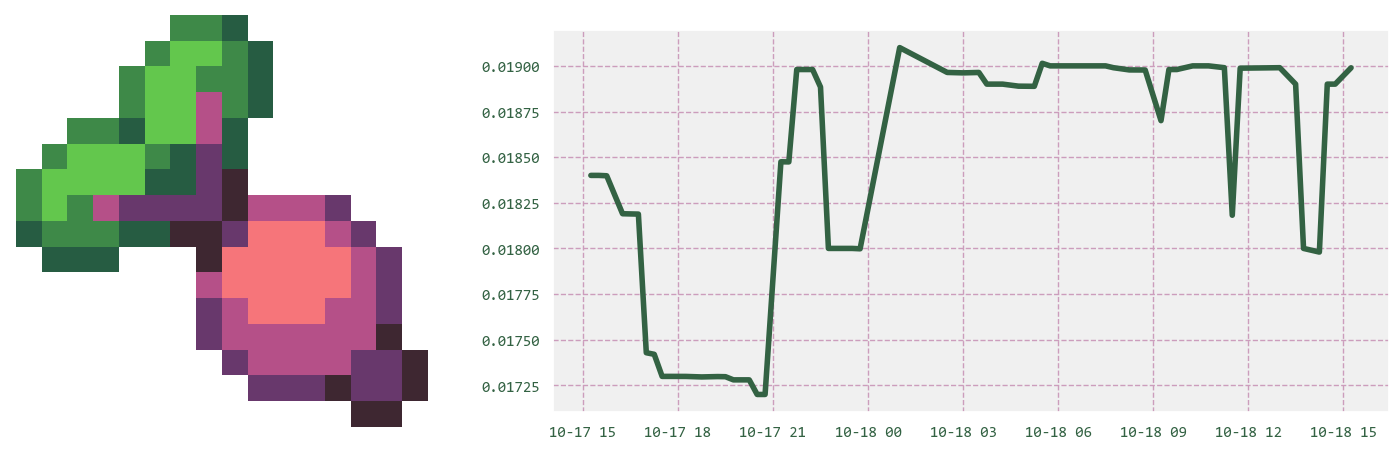

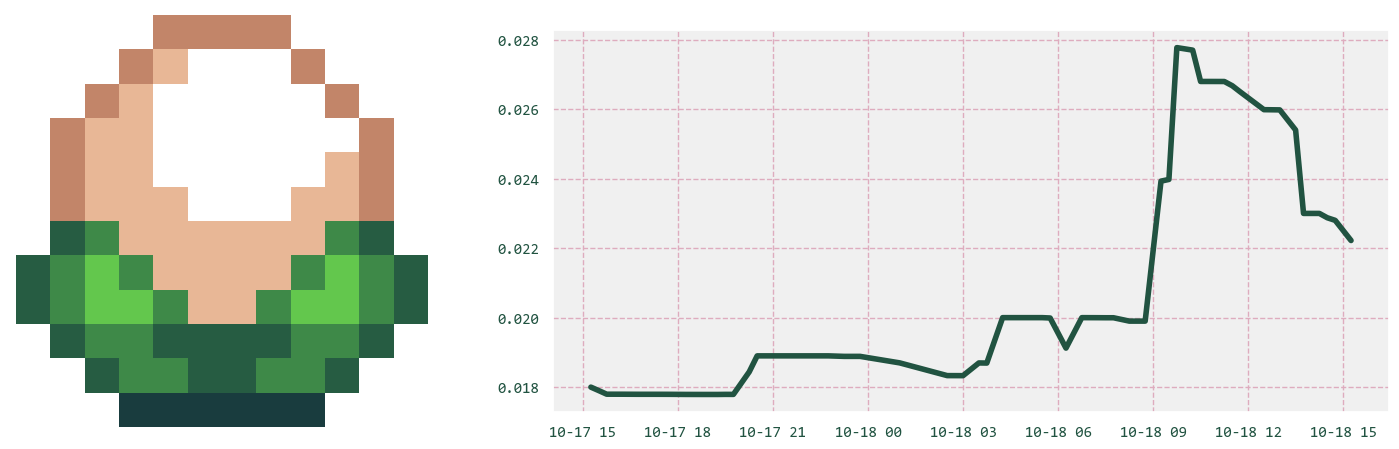

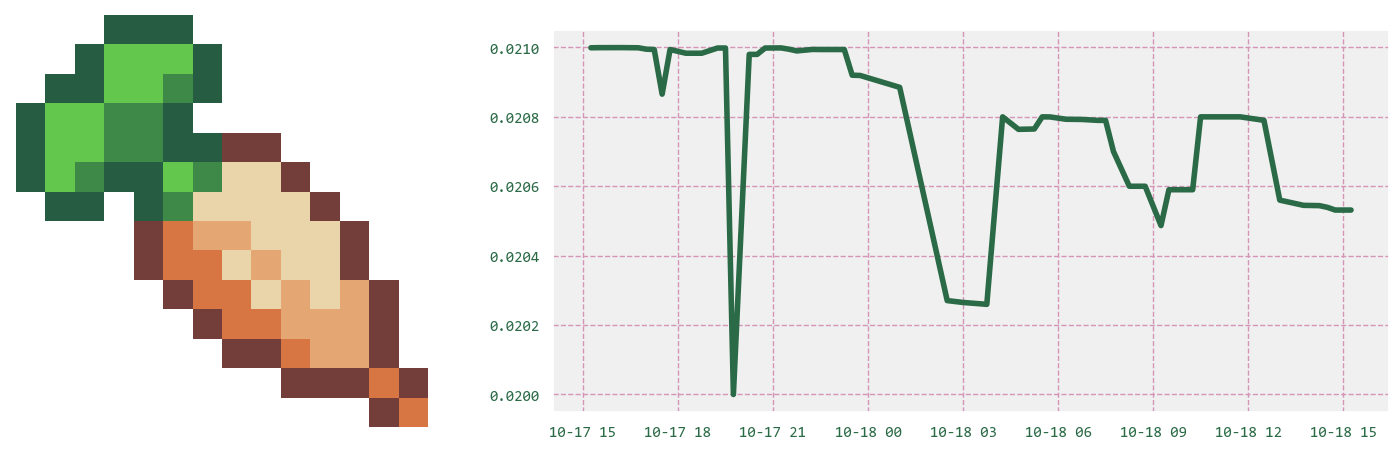

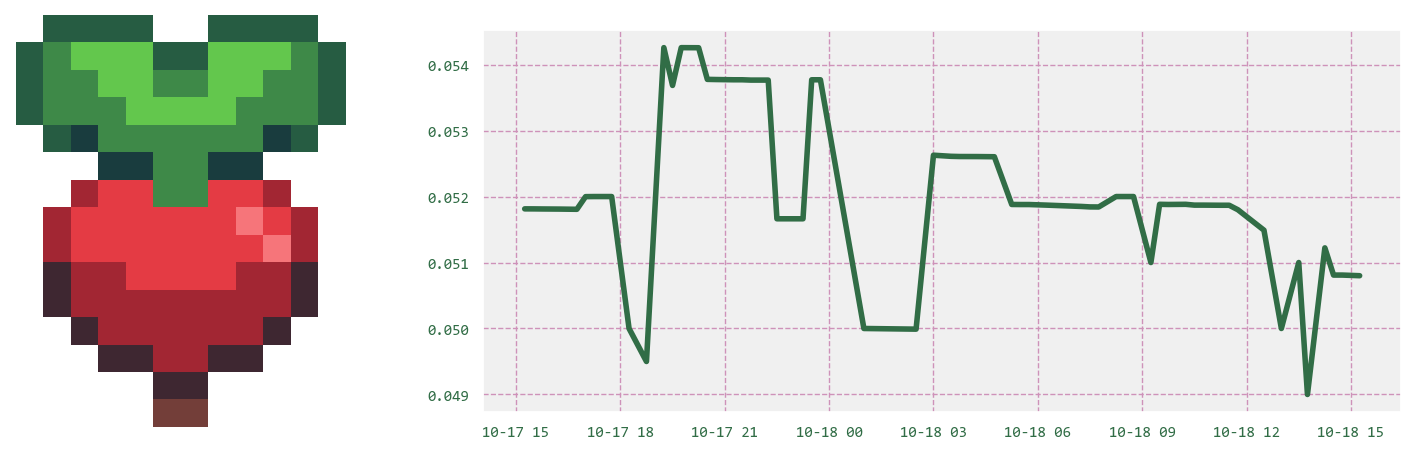

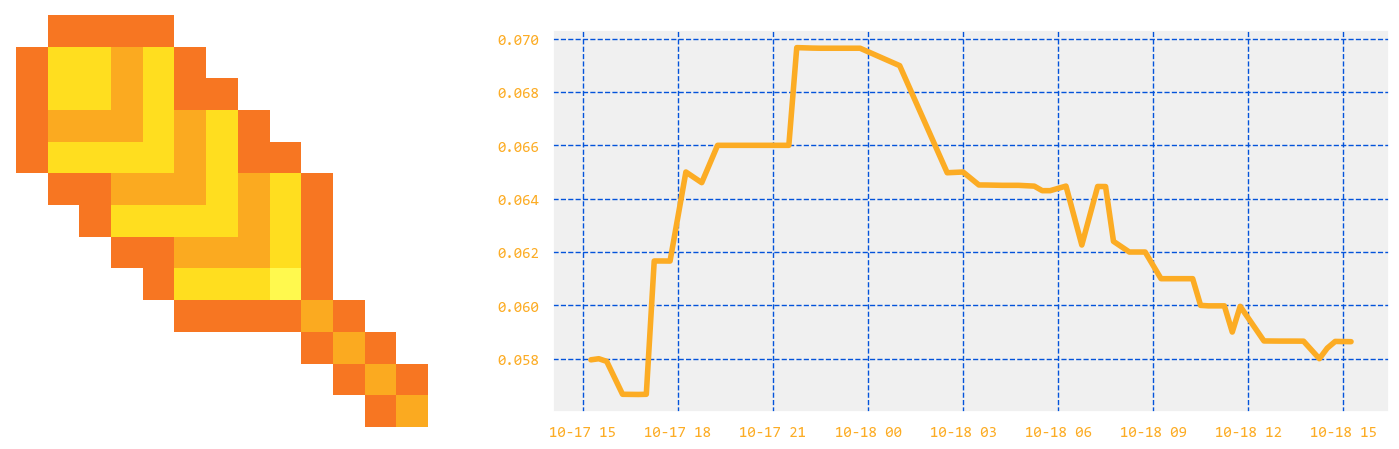

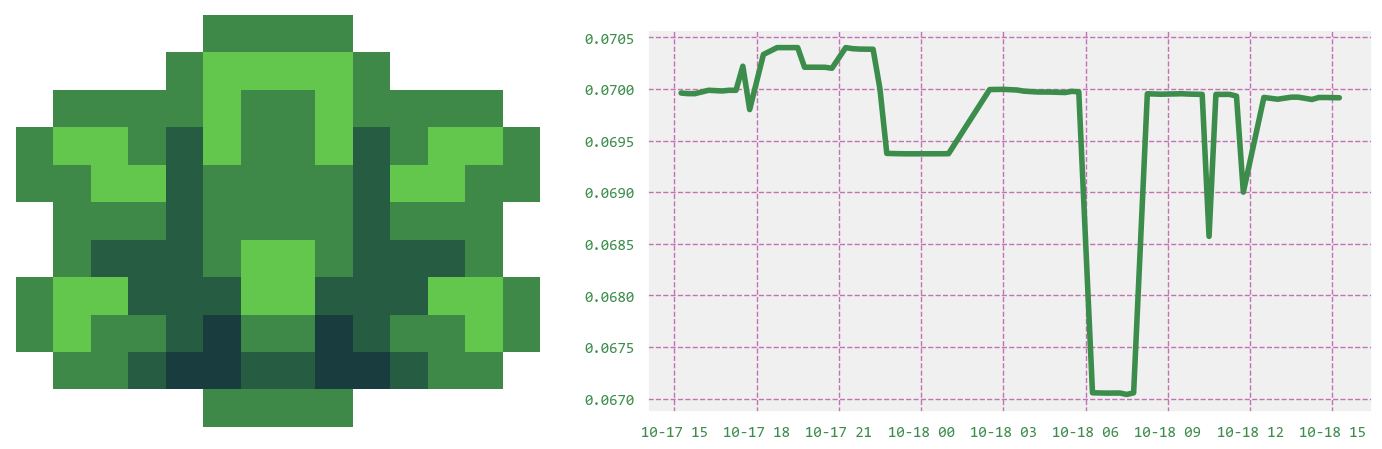

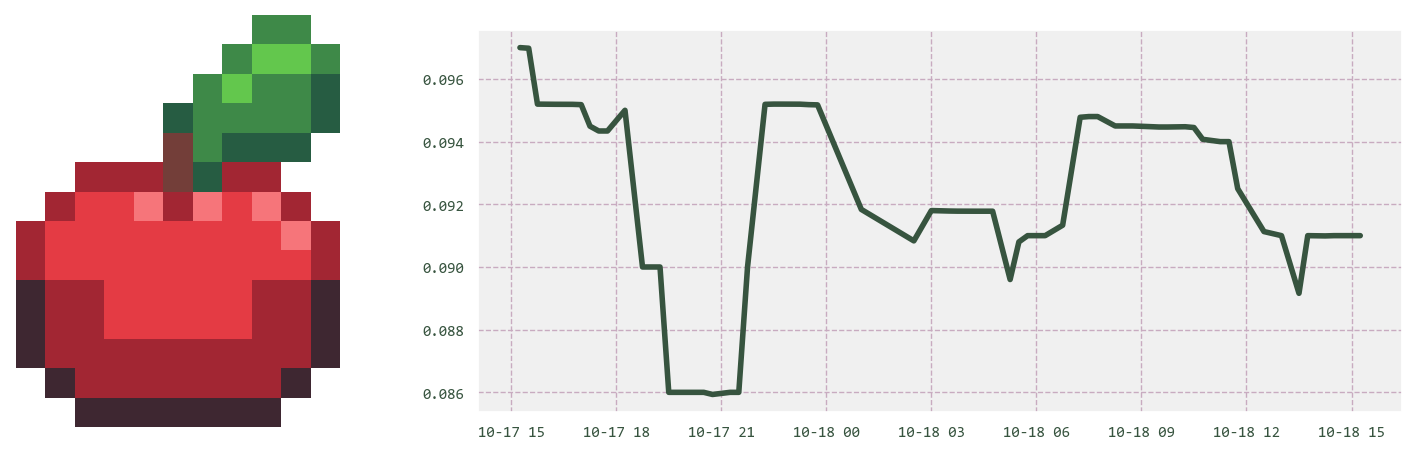

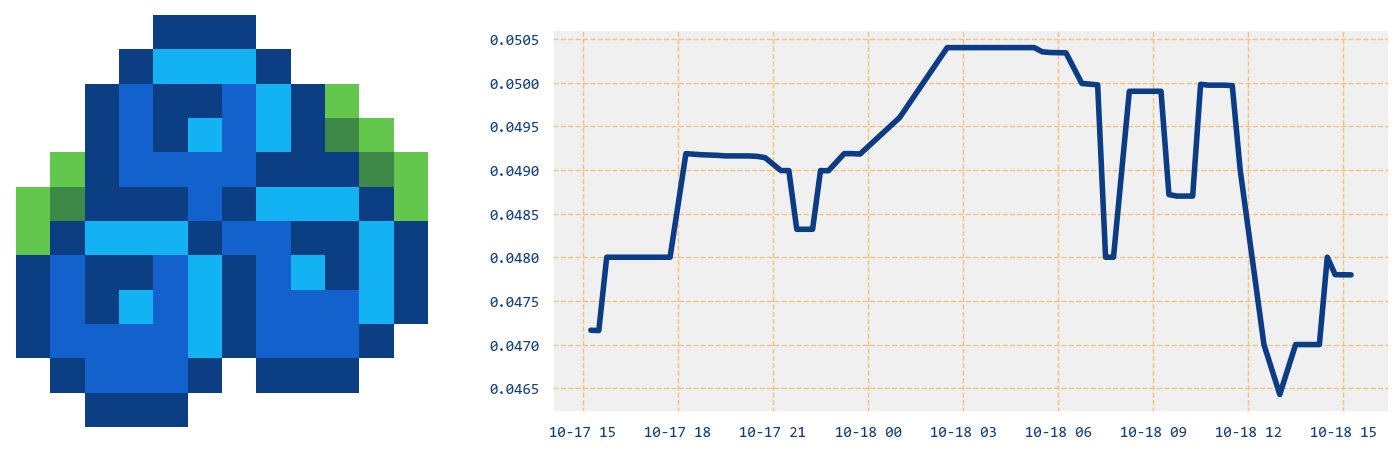

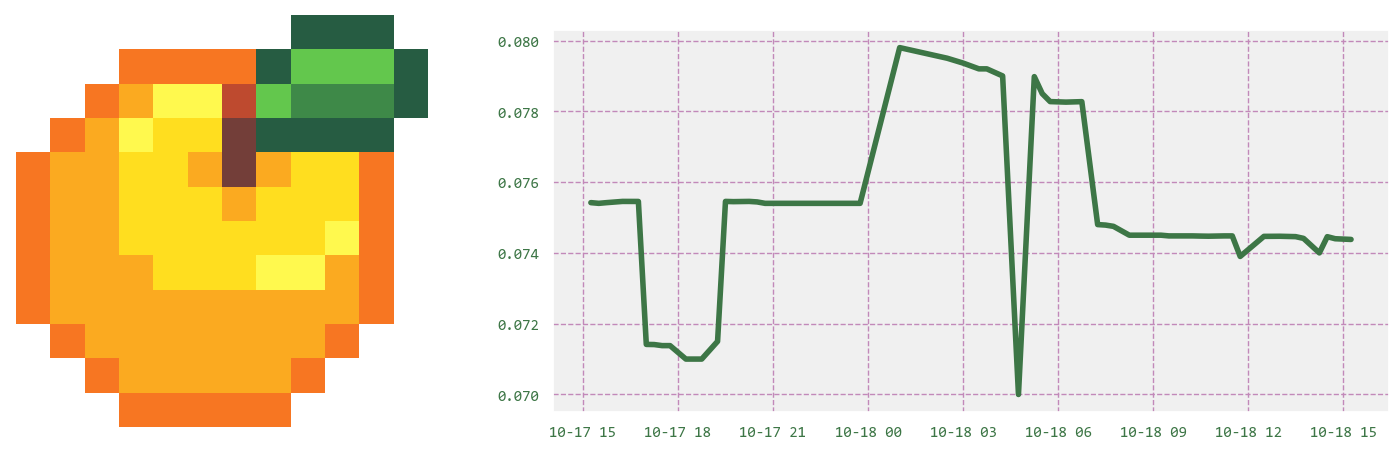

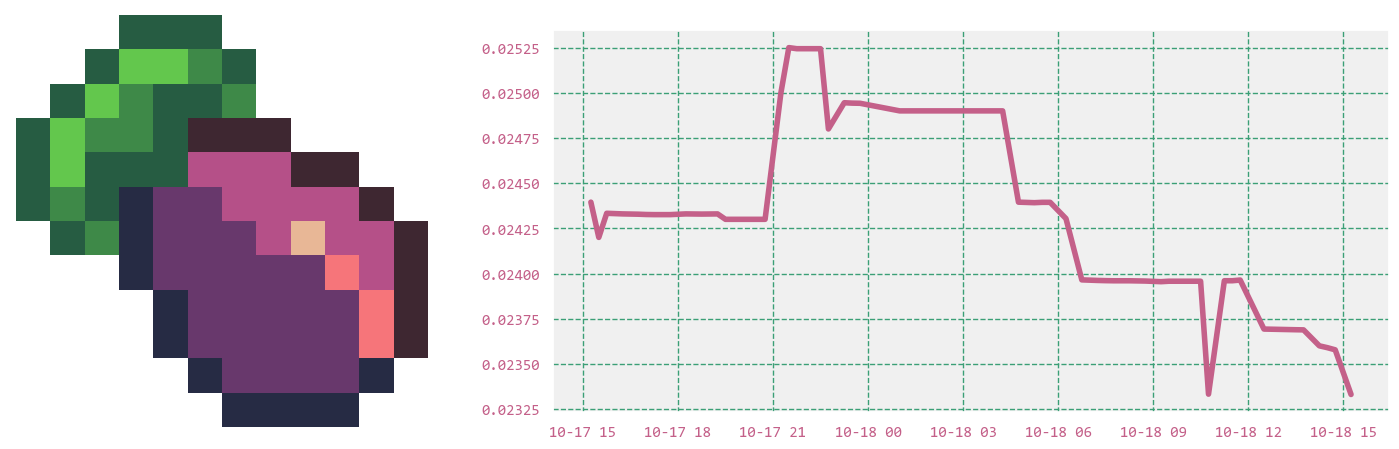

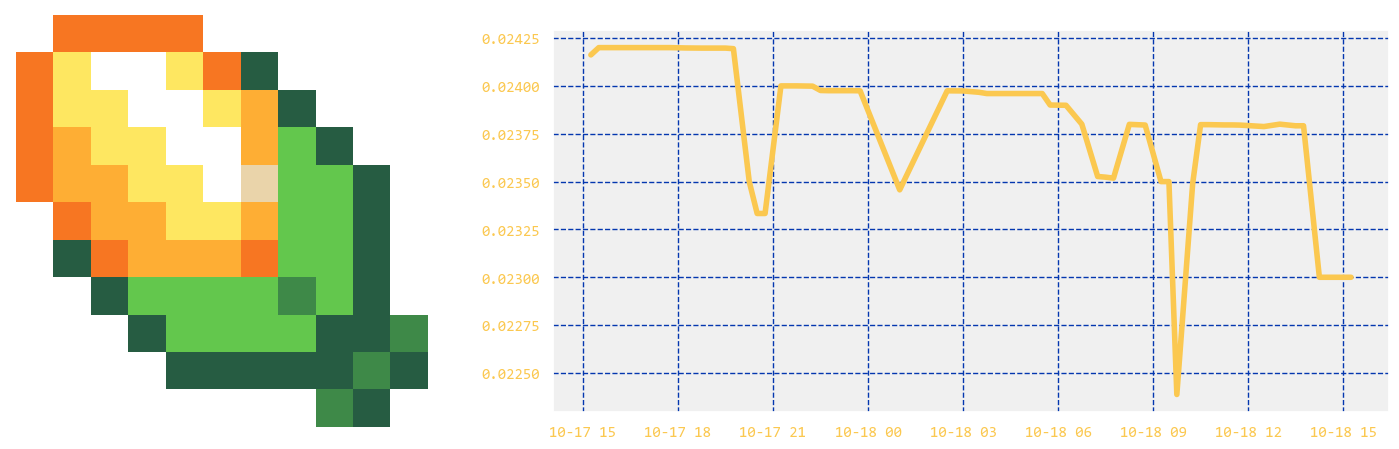

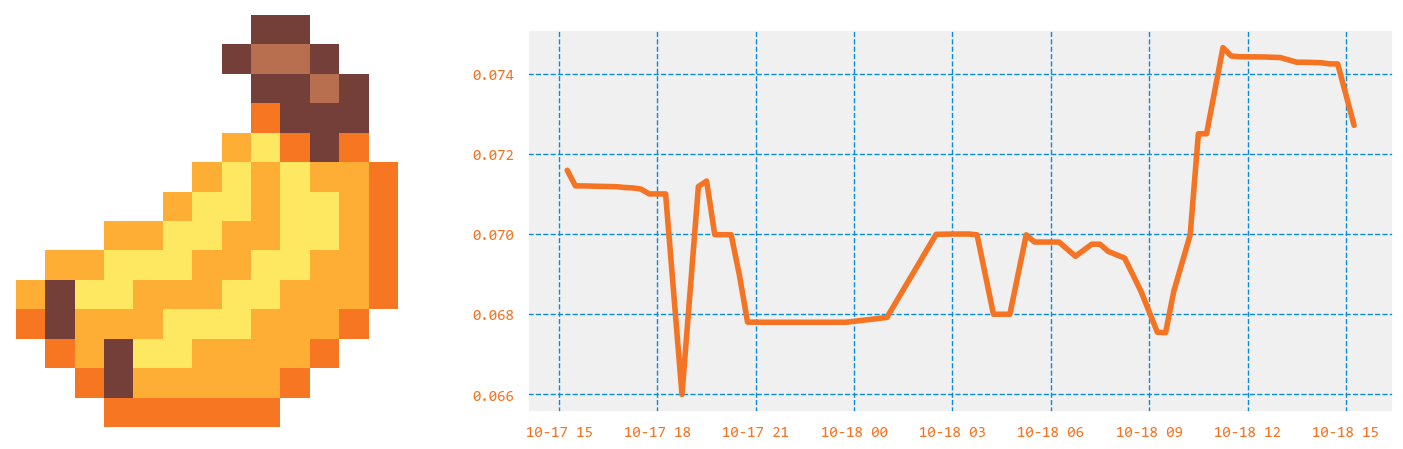

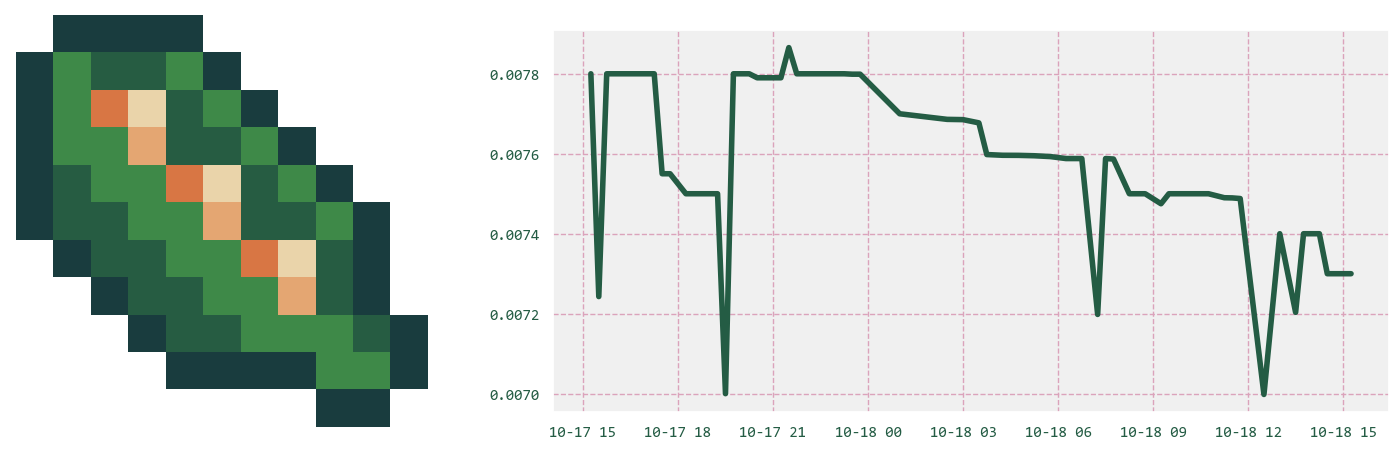

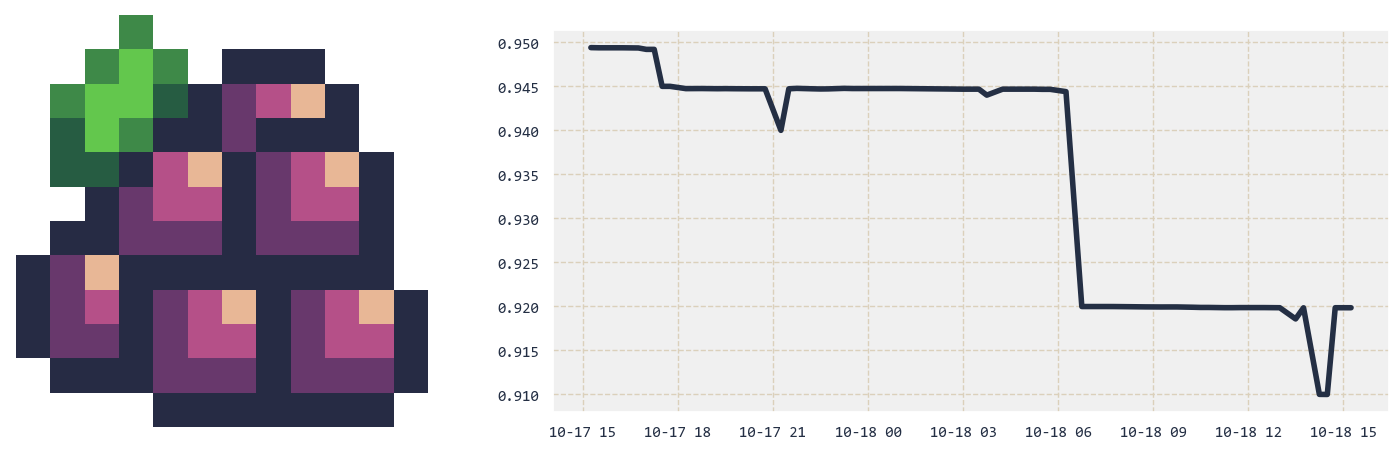

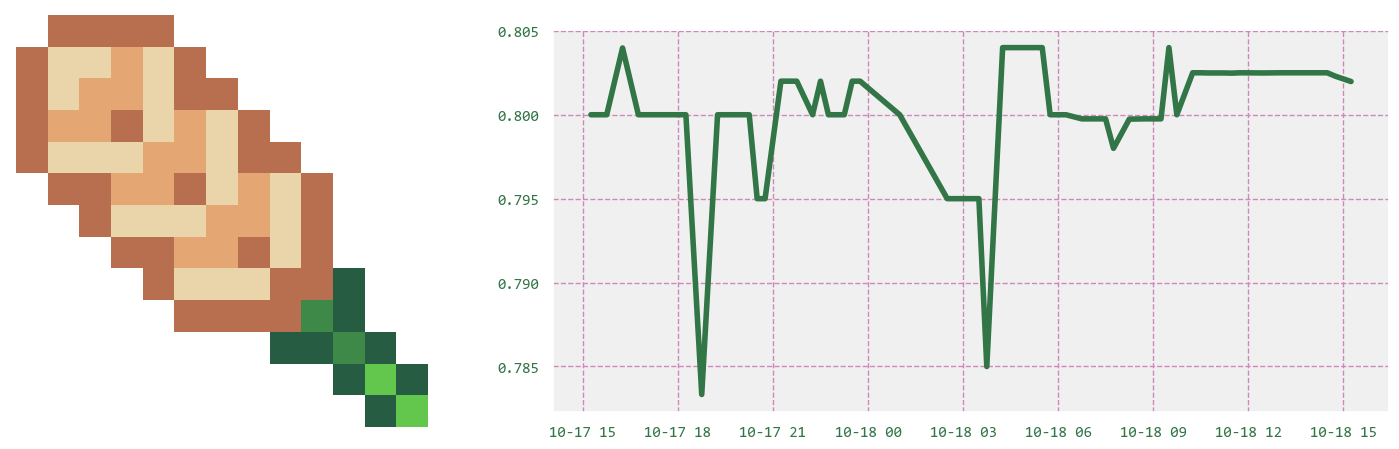

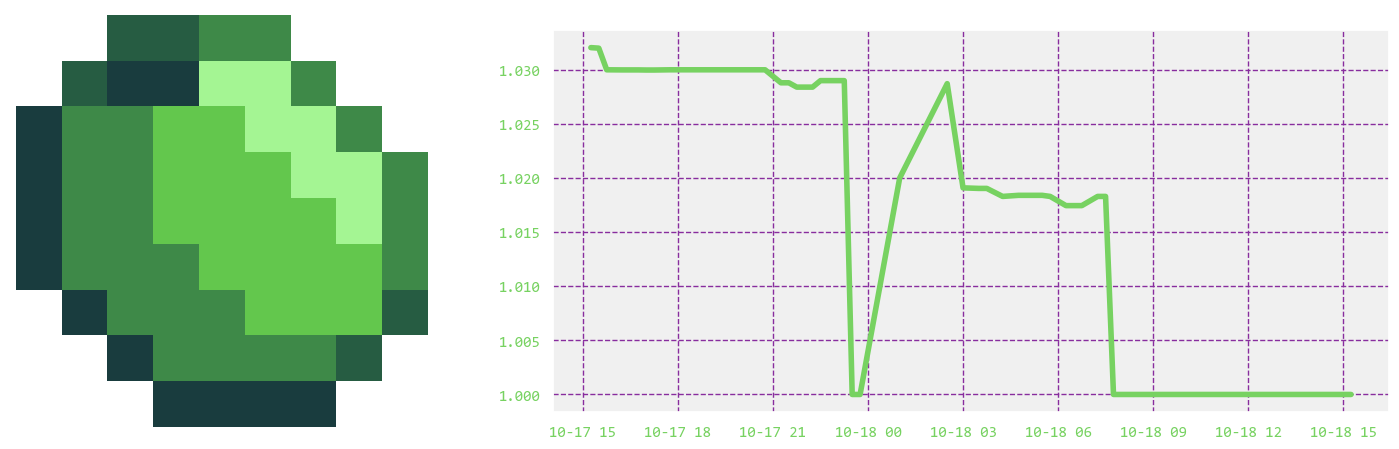

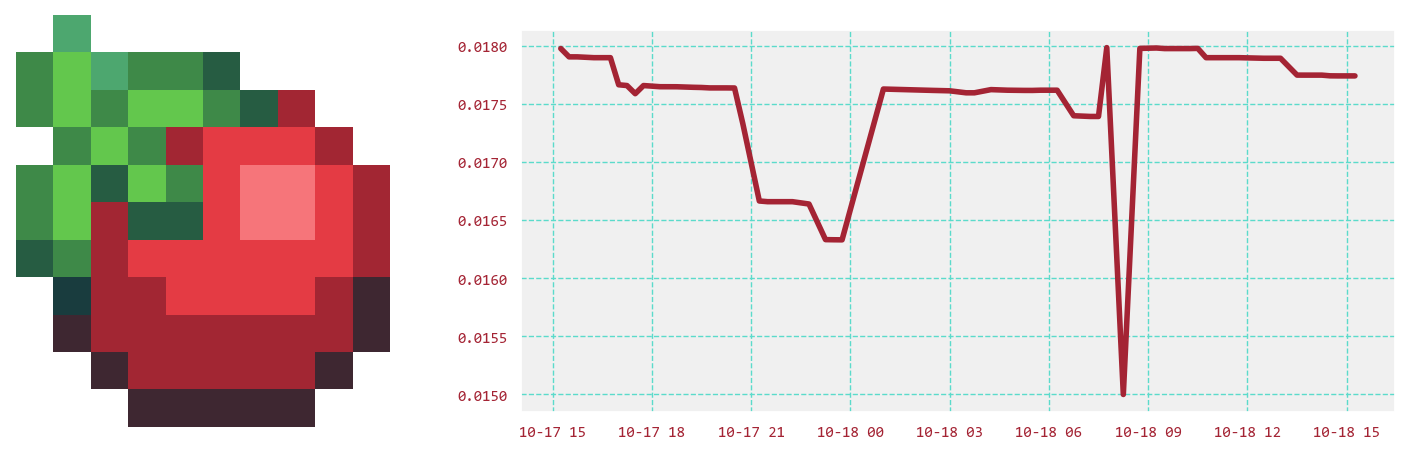

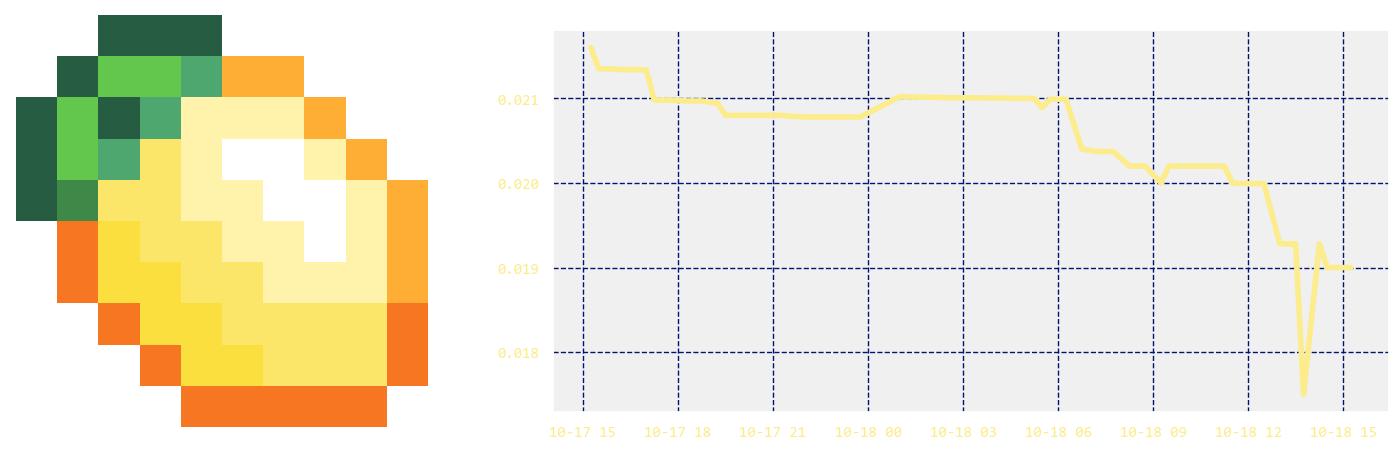

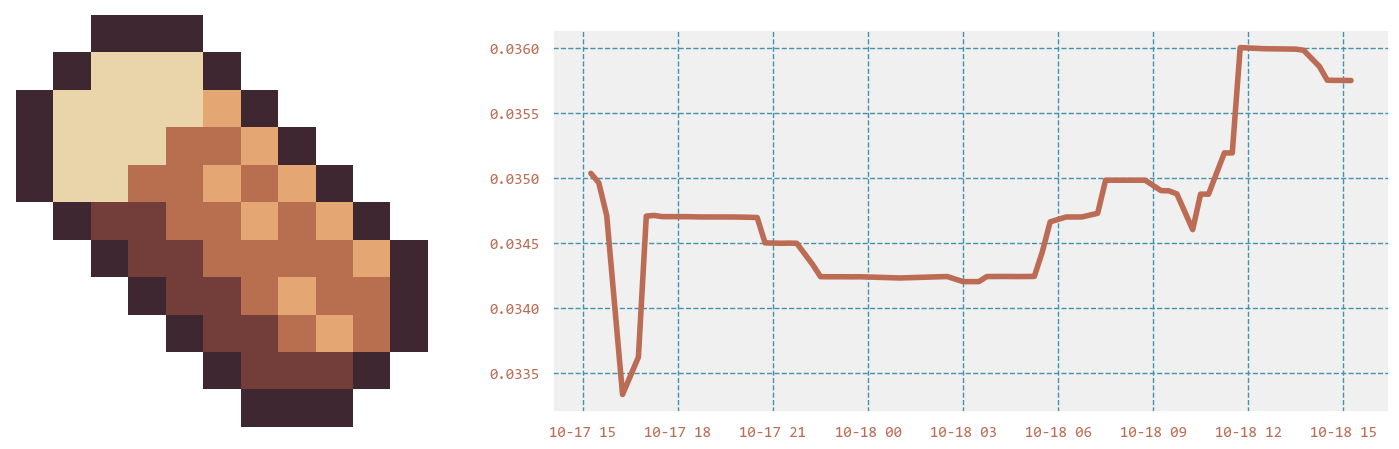

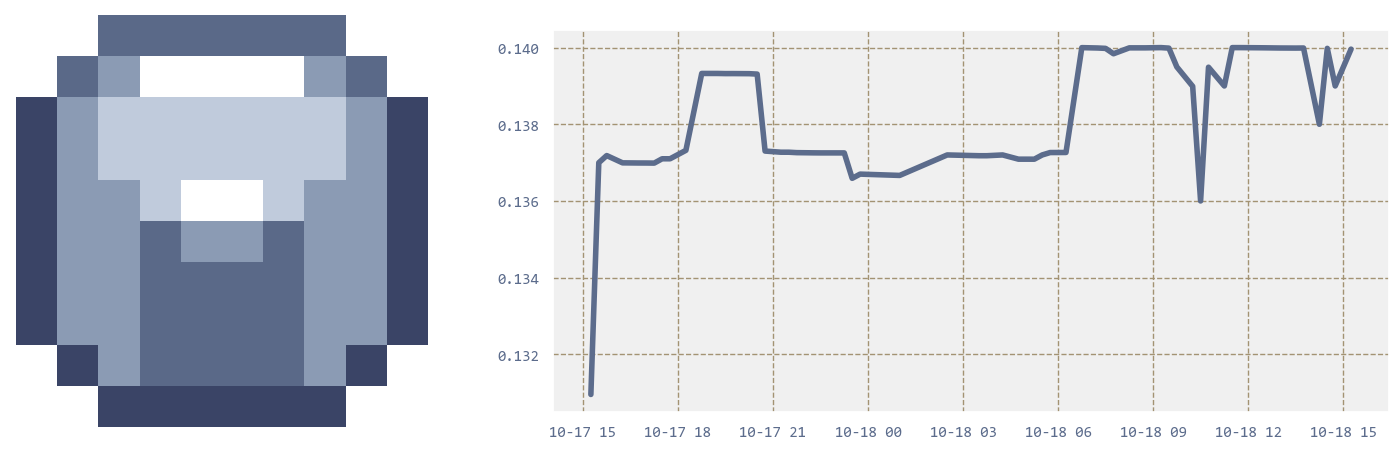

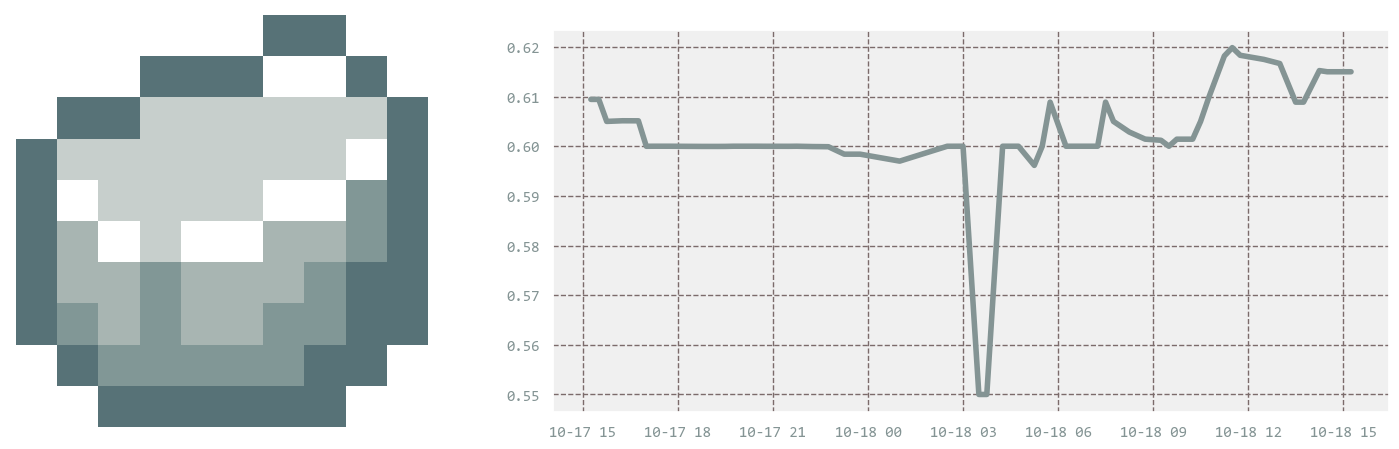

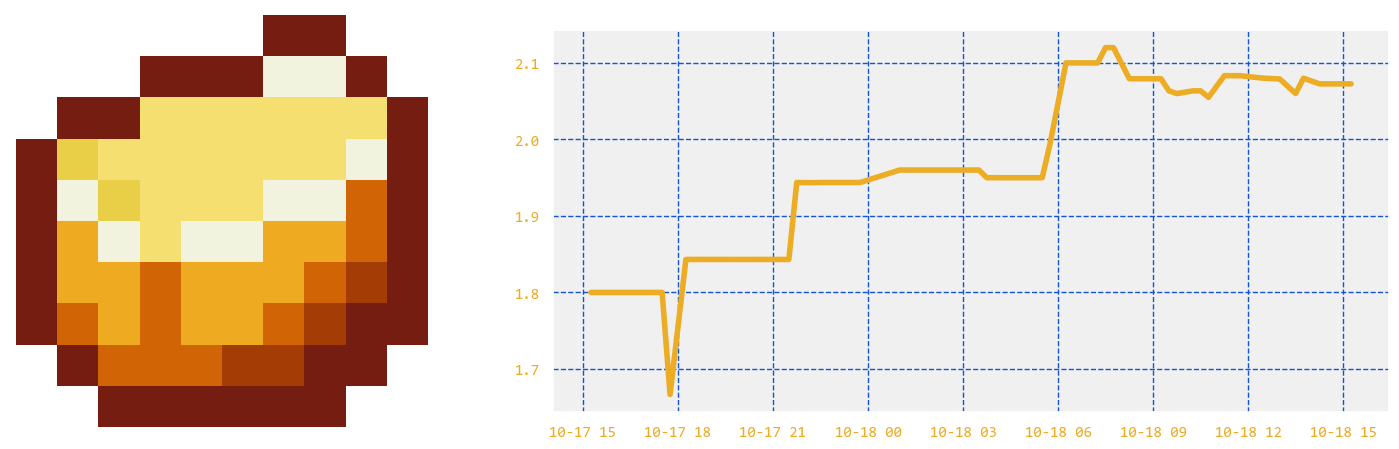

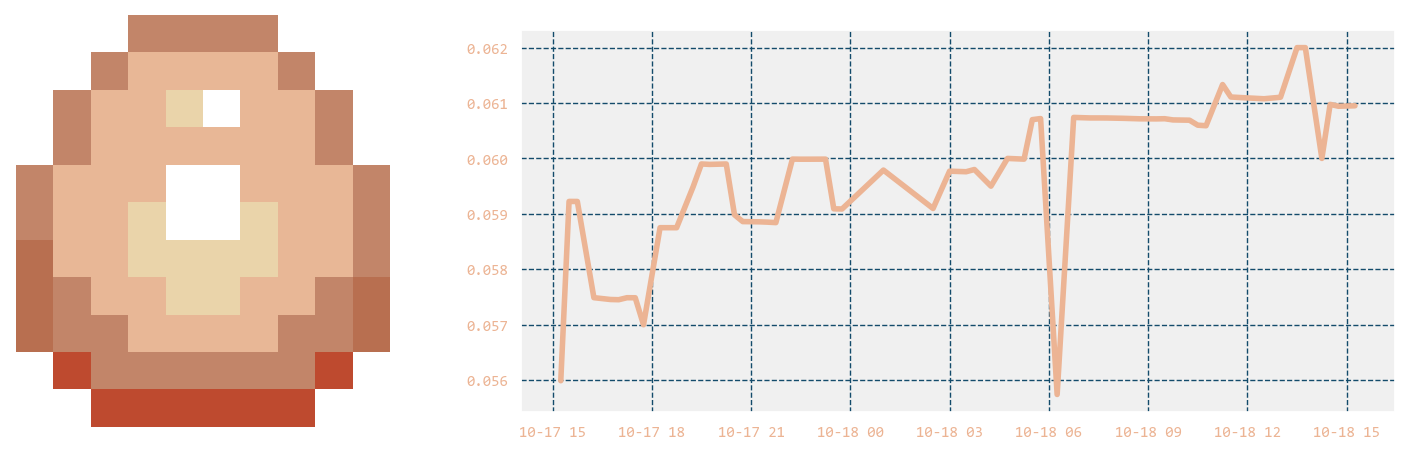

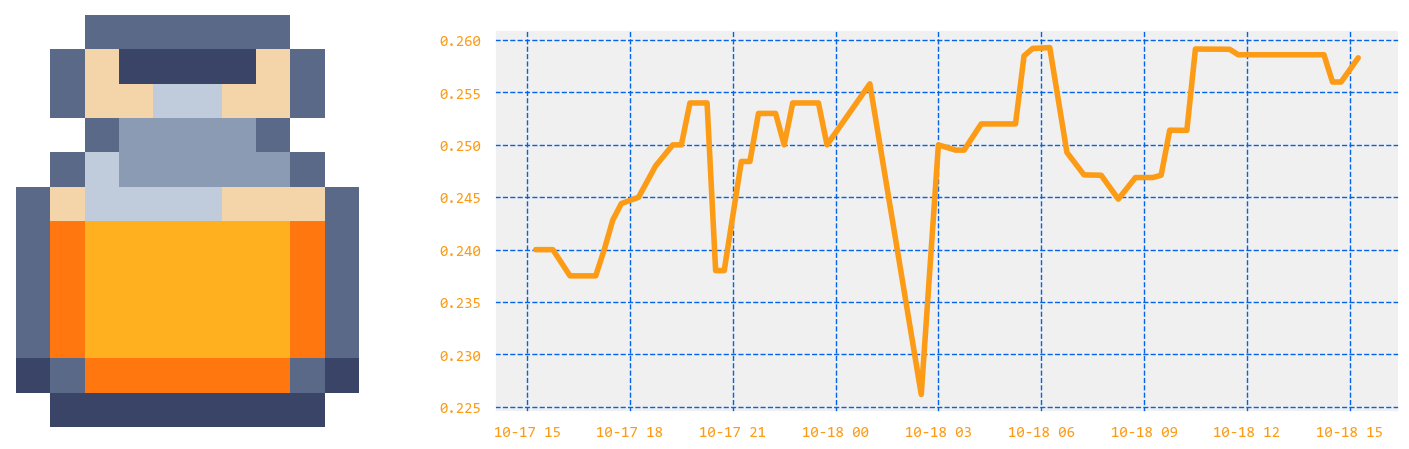

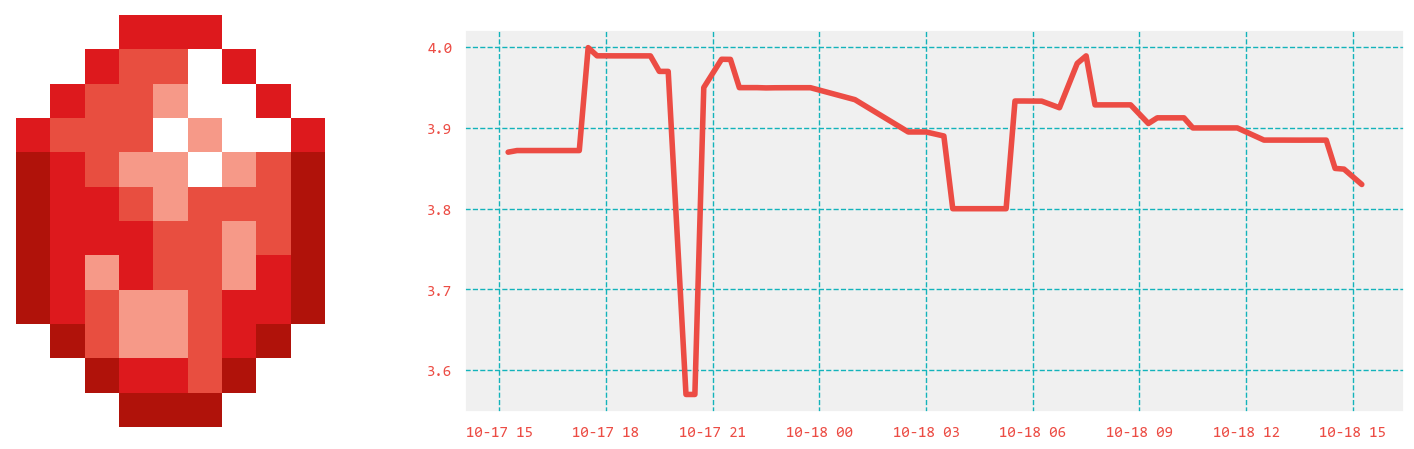

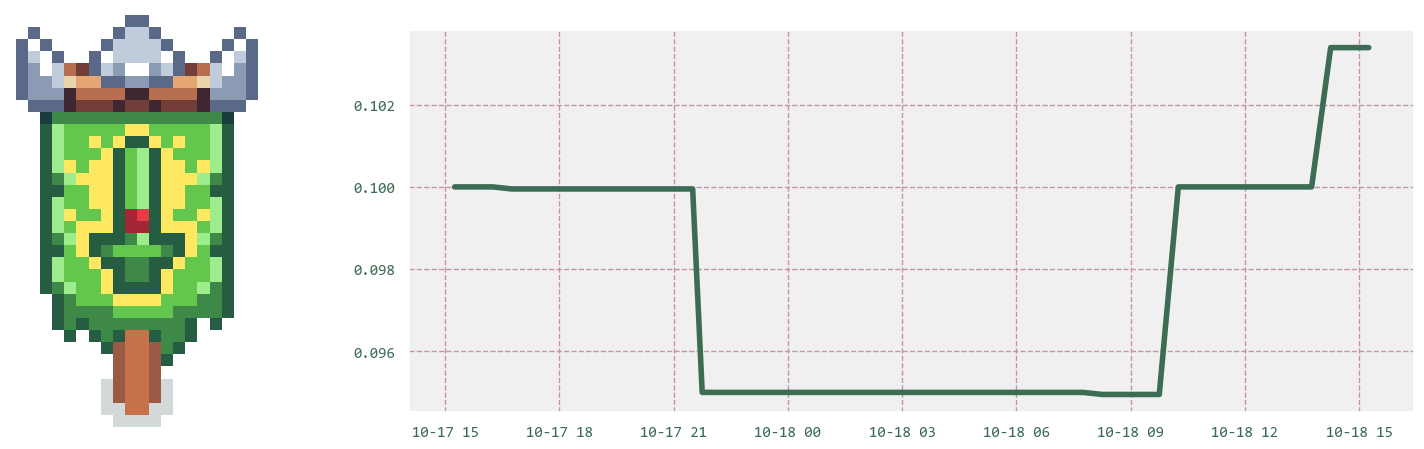

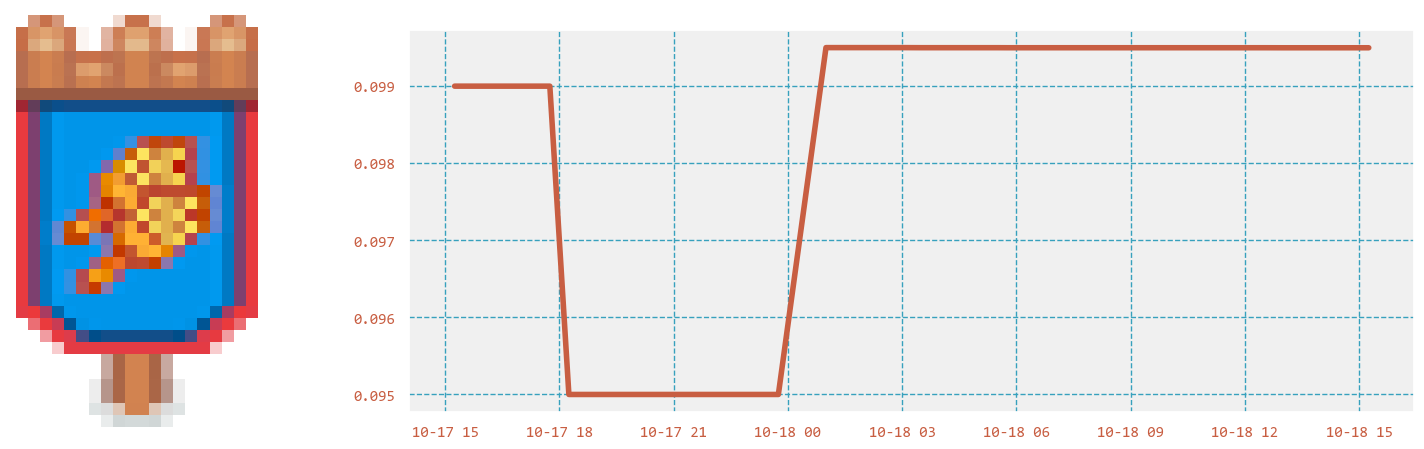

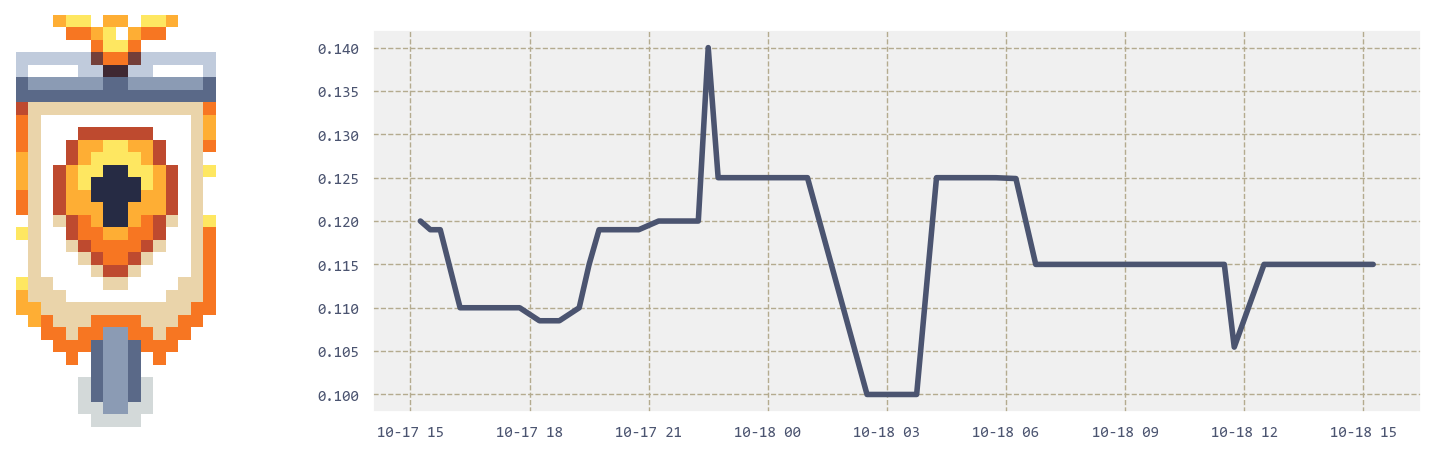

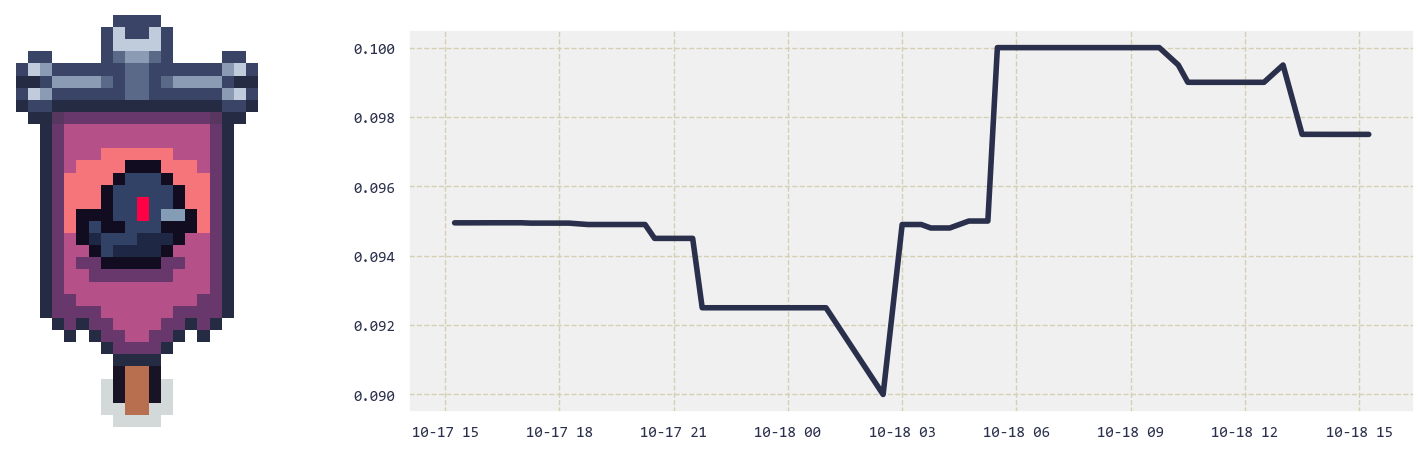

In [44]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
import numpy as np
from colorthief import ColorThief
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the CSV data (replace with your actual file path)
csv_file = 'price_tracking/resource_prices_2024_10.csv'  # Update this path to the location of your CSV
df = pd.read_csv(csv_file)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Seaborn style for better aesthetics
sns.set(style='darkgrid')

# Set the default font for all plots
rcParams['font.family'] = 'Consolas'
rcParams['font.size'] = 24

# Create the price_plots directory if it doesn't exist
if not os.path.exists('price_plots'):
    os.makedirs('price_plots')

# Function to get dominant color from an image
def get_dominant_color(image_path):
    color_thief = ColorThief(image_path)
    dominant_color = color_thief.get_color(quality=1)
    return dominant_color

# Function to add image near the plot on the left side with transparency handling
def add_image_left_side(fig, ax, image_path):
    img = Image.open(image_path).convert('RGBA')  # Maintain transparency
    img = np.array(img)
    
    # Get the height of the axes and the figure in inches
    ax_bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    ax_height_in_inches = ax_bbox.height  # Height of the plot area
    
    # Calculate the zoom factor based on the plot height
    img_height_in_inches = img.shape[0] / fig.dpi  # Image height in inches
    zoom_factor = ax_height_in_inches / img_height_in_inches  # Ensure image fits within plot height
    zoom_factor = zoom_factor / 1.3  # Adjust for better fit

    # Create the inset box with the image
    imagebox = OffsetImage(img, zoom=zoom_factor)
    ab = AnnotationBbox(imagebox, (-0.15, 0.5), frameon=False, xycoords='axes fraction', box_alignment=(1, 0.5))
    
    # Add the image to the current plot (ax)
    ax.add_artist(ab)

def opposite_color(rgb):
    """
    Calculate the opposite color of the given RGB color.
    
    Parameters:
        rgb (tuple): A tuple of (R, G, B) values where each value is between 0 and 255.
        
    Returns:
        tuple: A tuple of (R, G, B) values representing the opposite color.
    """
    return tuple(255 - value for value in rgb)

def opposite_color(rgb):
    """
    Calculate the opposite color of the given RGB color (0-255 range).
    
    Parameters:
        rgb (tuple): A tuple of (R, G, B) values where each value is between 0 and 255.
        
    Returns:
        tuple: A tuple of (R, G, B) values representing the opposite color.
    """
    return tuple(255 - value for value in rgb)

def normalize_color(rgb):
    """
    Normalize the RGB color from the range (0-255) to (0-1) for matplotlib.
    
    Parameters:
        rgb (tuple): A tuple of (R, G, B) values where each value is between 0 and 255.
        
    Returns:
        tuple: A tuple of (R, G, B) values normalized to the range (0-1).
    """
    return tuple(value / 255.0 for value in rgb)

# Create a function to plot each resource separately
def plot_each_resource_separately():
    unique_resources = df['Resource'].unique()
    
    # Loop through each resource and plot its price separately
    for resource in unique_resources:
        fig, ax = plt.subplots(figsize=(15, 5))  # Increased height for better alignment with image
        
        # Filter data for the current resource
        resource_data = df[df['Resource'] == resource]
        
        # Path to the corresponding image
        image_path = f'assets/{resource}.png'  # Ensure image names match resource names
        
        # Get the dominant color from the image
        dominant_color = get_dominant_color(image_path)
        
        # Normalize the dominant color for plotting
        dominant_color_normalized = normalize_color(dominant_color)
        
        # Plot the line using the dominant color
        sns.lineplot(data=resource_data, x='Date', y='P2P (SFL)', linewidth=4, color=dominant_color_normalized, ax=ax)
        
        # Set light gray background for the plot area
        ax.set_facecolor('#f0f0f0')  # Light gray background
        
        # Set text color (title, labels, ticks) to match plot color
        ax.title.set_color(dominant_color_normalized)
        ax.tick_params(colors=dominant_color_normalized)
        
        # Get the opposite color in RGB and normalize it for plotting
        opposite_grid_color = normalize_color(opposite_color(dominant_color))

        # Show the grid explicitly
        ax.grid(True, color=opposite_grid_color, linewidth=1, linestyle='--')  # Light gray dashed grid
        
        # Hide x and y labels but keep the grid
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)
        
        # Add the image on the left side
        add_image_left_side(fig, ax, image_path)
        
        # Customize the appearance
        plt.tight_layout()
        
        # Replace spaces in the resource name with underscores and save the plot to the price_plots folder
        resource_name_safe = resource.lower().replace(' ', '_')
        plot_filename = f'price_plots/{resource_name_safe}_price_plot.png'
        
        # Save the plot with a transparent background
        plt.savefig(plot_filename, bbox_inches='tight', transparent=True)  # Save the figure to file with transparency
        
        # Display the plot
        plt.show()





# Call the function to plot each resource and save them
plot_each_resource_separately()
